

# Project: No-Show Appointments Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The no-show medical appointments dataset has information on over 100K appointment in Brazil. The dataset contains health information of patients and whether or not patients show up for thier appointments. The dataset is focused on determinig whether or not patients show up for their appointment. There are features in the dataset that will help in that regard.
>

## Research questions:
> #### Do patients who receive sms show up for their appointmemts?
> #### What percentage of male or female either show up or do not show up for thier appointment?
> #### Do patients who receive scholarhip show up for their appointments?

In [1]:
# import packages for the data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os 
os.chdir(r"C:\Users\RICHARD\Desktop\DS\Data Sets")

<a id='wrangling'></a>
## Data Wrangling



### General Properties
Pandas will be very useful in loading the data in other to check out for the fatures of the data

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Know the number of rows and column in the dataset
df.shape

(110527, 14)

In [5]:
# Check to see if null values exist
sum(df.isnull().sum())

0

In [6]:
# Undestand the general properties of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Explore the quantitative features of the dataset using the describe function
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
# Want to find out the unique ID so it can be used as index to replace the default
df.PatientId.nunique(), df.AppointmentID.nunique()

(62299, 110527)

From the uniqueness of the ID's it can be explained that the PatientId repeats throughout the dataset and the AppointmentID equals the number of rows in the data. Therefore the AppointmentID can be used as index to replace the default.

In [9]:
df.set_index('AppointmentID', inplace = True,)


### Data Cleaning 
> #### In the wrangling done above it can been seen that the ScheduleDay and the AppointmentDay are object types and therfore need to be changed to datetime.
> #### The noshow column written as 'No-show' can be changed to 'No_show' to make it clean to read.
> #### From the describe function we can see that the minimum age is -1 which is impossible and that of the maximum age is 115.They might be outliers and will be investigated further.

In [10]:
# Change the ScheduleDay to date time
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],)

In [11]:
# Change the AppointmentDay to date time
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'],)

In [12]:
# Check to confirm whether they have been change to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 5642903 to 5629448
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   Gender          110527 non-null  object             
 2   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 3   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 4   Age             110527 non-null  int64              
 5   Neighbourhood   110527 non-null  object             
 6   Scholarship     110527 non-null  int64              
 7   Hipertension    110527 non-null  int64              
 8   Diabetes        110527 non-null  int64              
 9   Alcoholism      110527 non-null  int64              
 10  Handcap         110527 non-null  int64              
 11  SMS_received    110527 non-null  int64              
 12  No-show         110527 non-null  object             
dtypes: date

In [13]:
# Renaming 'No-show' as 'No_show'
df.rename(columns={'No-show': 'No_show'}, inplace = True)

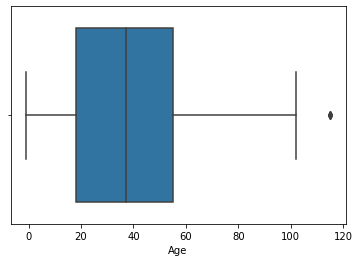

In [14]:
# Further investigations of the outliers in the age column
sns.boxplot(data = df, x = 'Age');

From the boxplot we can see that the outlier at the right side is closer to 120. We need to investigate the people above the age of 100 for more insight.

In [15]:
# Find out the number of people above the age of 100
df.query('Age > 100')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
AppointmentID,,,,,,,,,,,,,
5651757,9.762948e+14,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,No
5700278,3.196321e+13,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
5700279,3.196321e+13,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
5562812,3.196321e+13,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
5744037,3.196321e+13,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No
5751563,2.342836e+11,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,No
5717451,7.482346e+14,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No


Since the outlier is very closer to 120, we will remove those with the age of 115 and maintain those with the age of 102.


In [16]:
# The number of entry with the age of -1
df.query('Age < 0 ')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
AppointmentID,,,,,,,,,,,,,
5775010,4.659432e+14,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


Only one entry has the age of -1 and this might be attributed to wrong entry or error. This will be removed to avoid outliers in the age column.

In [17]:
# Trim the outliers
df = df[(df.Age > -1) & (df.Age < 115)]

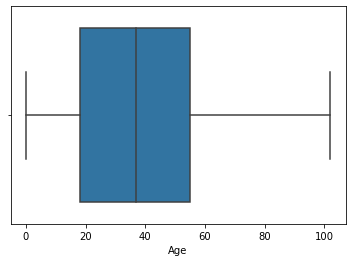

In [18]:
# Check to see if it has been remved
sns.boxplot(data = df, x = 'Age');

The outlier has been removed

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Do patients who receive sms show up for their appointmemts?


In [19]:
df.head()


,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
AppointmentID,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
# Find the relationship that exist between No_show and SMS_recieved
grpby = df.groupby('No_show')['SMS_received'].value_counts()

In [21]:
grpby

No_show  SMS_received
No       0               62508
         1               25697
Yes      0               12532
         1                9784
Name: SMS_received, dtype: int64

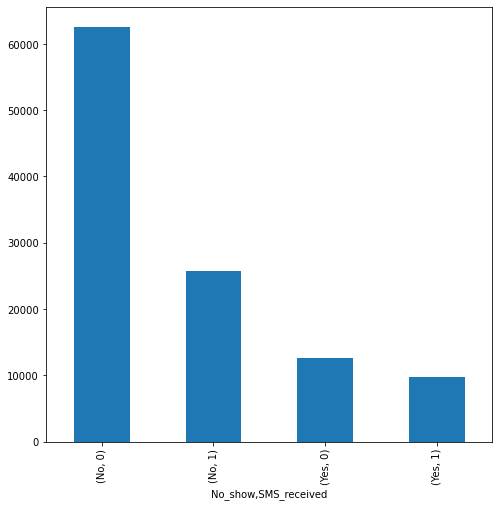

In [22]:
grpby.plot(kind = 'bar', figsize = (8,8));

The number of people who don't receive sms but show up for thier appointmnet is higher than those who receive sms but do not show up for thier appointment.This means that there are other matters that need to be considered to understand why people who receive sms do not show up for thier appointment.

### Research Question 2: What percentage of male or female either show up or do not show up for thier appointment?

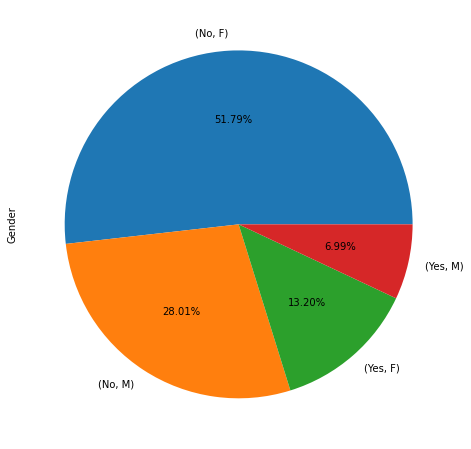

In [23]:
df.groupby('No_show')['Gender'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%', figsize = (8,8));

Majority of females show up for their appointment as compared to males.It can also been seen that females who do not show up for their appointment are more than males who do not show up for their appointment.

### Research Question 3: Do patients who receive scholarship show up for their appointments?

In [24]:
df.groupby('Scholarship')['No_show'].value_counts()

Scholarship  No_show
0            No         79922
             Yes        19738
1            No          8283
             Yes         2578
Name: No_show, dtype: int64

It is clearly seen that 8283 number of people who are enrolled in the Brasilian welfare program show up for their appointments.79922 people who are not enrolled in the welfare program show up for their appointment.This is huge than those who receive scholarhip but do not show up for their appointments.

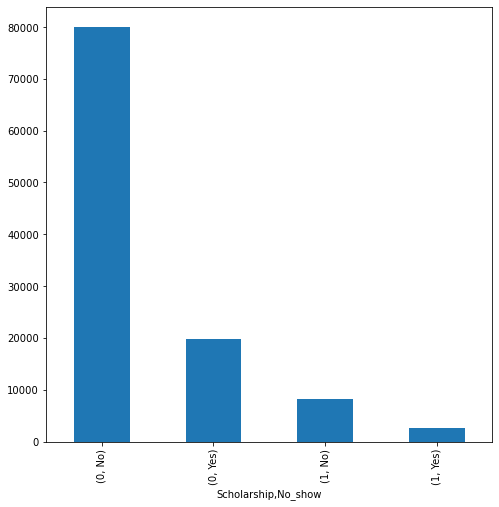

In [25]:
#Graphically representing the above on a bar chart
df.groupby('Scholarship')['No_show'].value_counts().plot(kind = 'bar',figsize = (8,8));

It is clearly seen that those who do not receive the schoalrship but show up for their appointment(0 , No) is higer than those who receive the scholarship and do not show up for thier appointment(1, Yes).


<a id='conclusions'></a>
## Conclusions

> #### The number of people who don't receive sms but show up for thier appointmnet is higher than those who receive sms but do not show up for thier appointment.This means that there are other matters that need to be considered to understand why people who receive sms do not show up for thier appointment.
> #### Majority of females show up for their appointment as compared to males.It can also been seen that females who do not show up for their appointment are more than males who do not show up for their appointment.
> #### It is clearly seen that 8283 number of people who are enrolled in the Brasilian welfare program show up for their appointments.79922 people who are not enrolled in the welfare program show up for their appointment.This is huge than those who receive scholarhip but do not show up for their appointments. It is clearly seen that those who do not receive the schoalrship but show up for their appointment(0 , No) is higer than those who receive the scholarship and do not show up for thier appointment(1, Yes).
> #### One limitation found in the anaysis was the fact that people who are enrolled in the Brazilian welfare program actually do not show up for their appointment. A further investigation need to be done to find out why they don't show up for their appointment.